In [1]:
from core.Hypernetwork import Hypernetwork
from utils.HTCompiler import load_parser, compile_hn
from utils.HTGraph import to_graph
from utils.HTLaTeX import latex
from utils.HTInOut import to_data, from_data

In [2]:
from IPython.display import Image, display, Math, Latex
from IPython.display import JSON

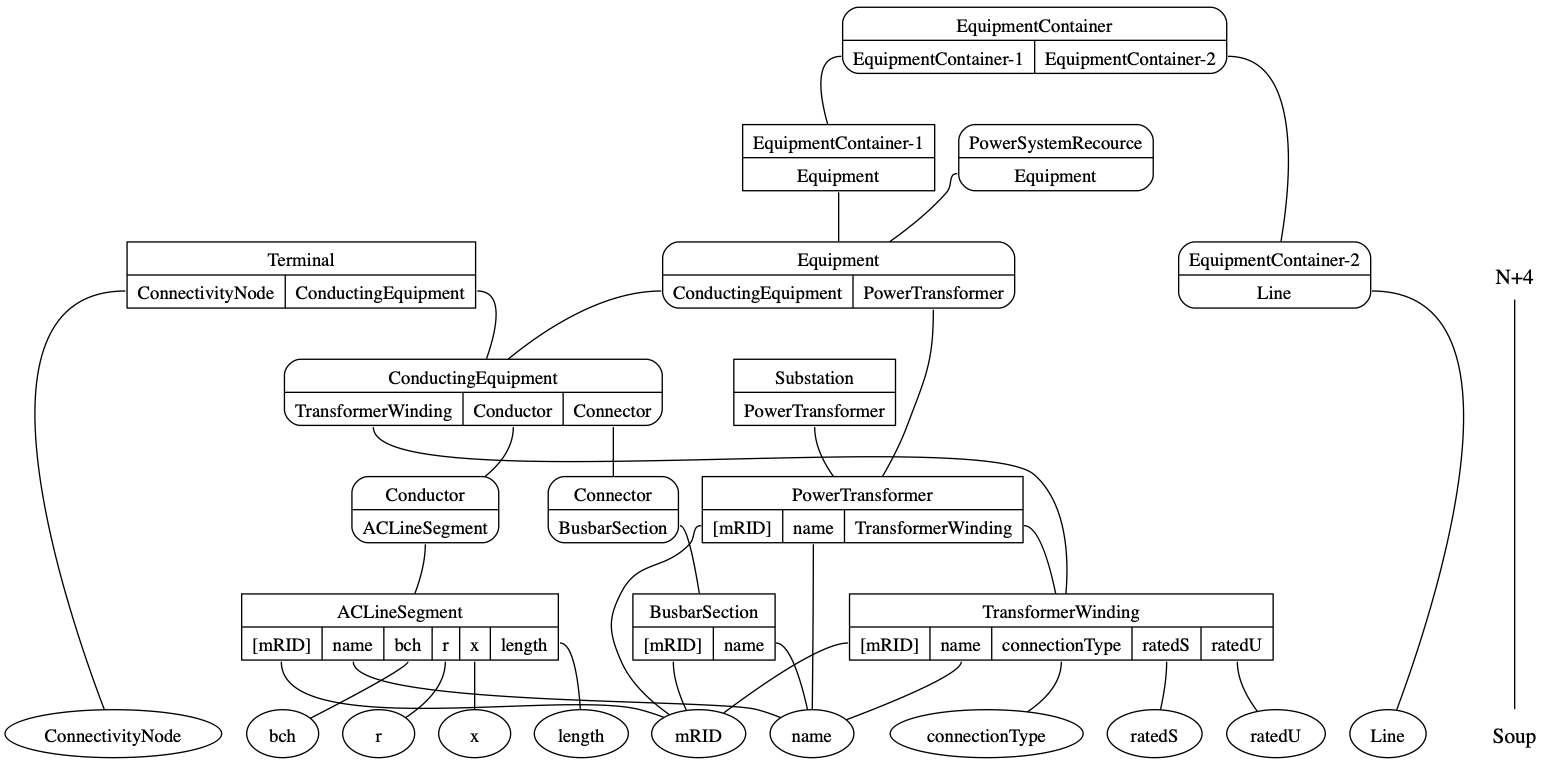

In [12]:
hn = Hypernetwork()
parser = load_parser()

compile_hn(hn, parser, """
    Terminal=<ConnectivityNode, ConductingEquipment>^N+4
    PowerSystemRecource={Equipment}
    Substation=<PowerTransformer>
        PowerTransformer=<!mRID, name, 
            TransformerWinding=<!mRID, name, connectionType, ratedS, ratedU>>
    Equipment={ConductingEquipment, PowerTransformer}
        ConductingEquipment={TransformerWinding, Conductor, Connector}
        Connector={BusbarSection}
            BusbarSection=<!mRID, name>
        EquipmentContainer=<Equipment>
        Conductor={ACLineSegment}
        ACLineSegment=<!mRID, name, bch, r, x, length>
    EquipmentContainer={Line}
""")

to_graph(hn, fname="/tmp/yoda-CIM-eg", view=False)
Image(filename='/tmp/yoda-CIM-eg.png', width=1400, height=1200)

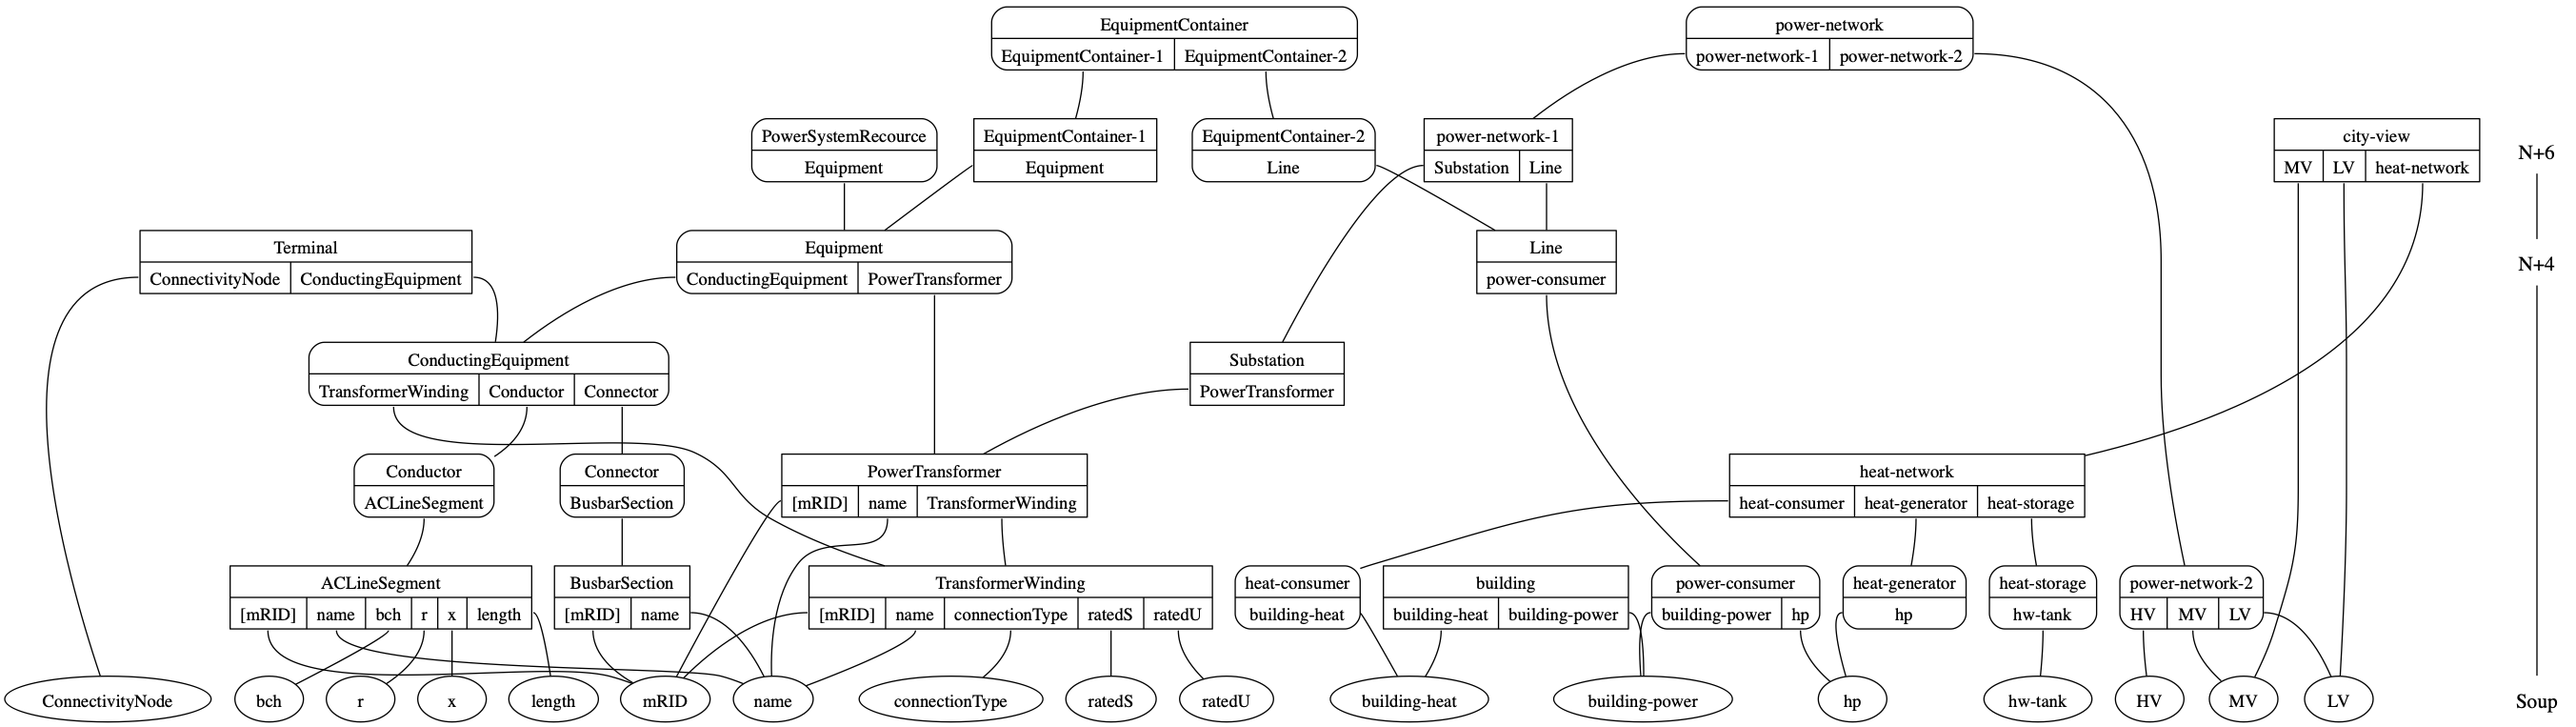

In [15]:
# Add heating

compile_hn(hn, parser, """
    heat-network=<heat-consumer, heat-generator, heat-storage>
        heat-consumer={building-heat}
        heat-generator={hp}
        heat-storage={hw-tank}
    Line=<power-consumer>^N+4
        power-consumer={building-power, hp}
            building=<building-heat, building-power>
""")

to_graph(hn, fname="/tmp/yoda-CIM-eg-heat", view=False)
Image(filename='/tmp/yoda-CIM-eg-heat.png', width=1600, height=1400)

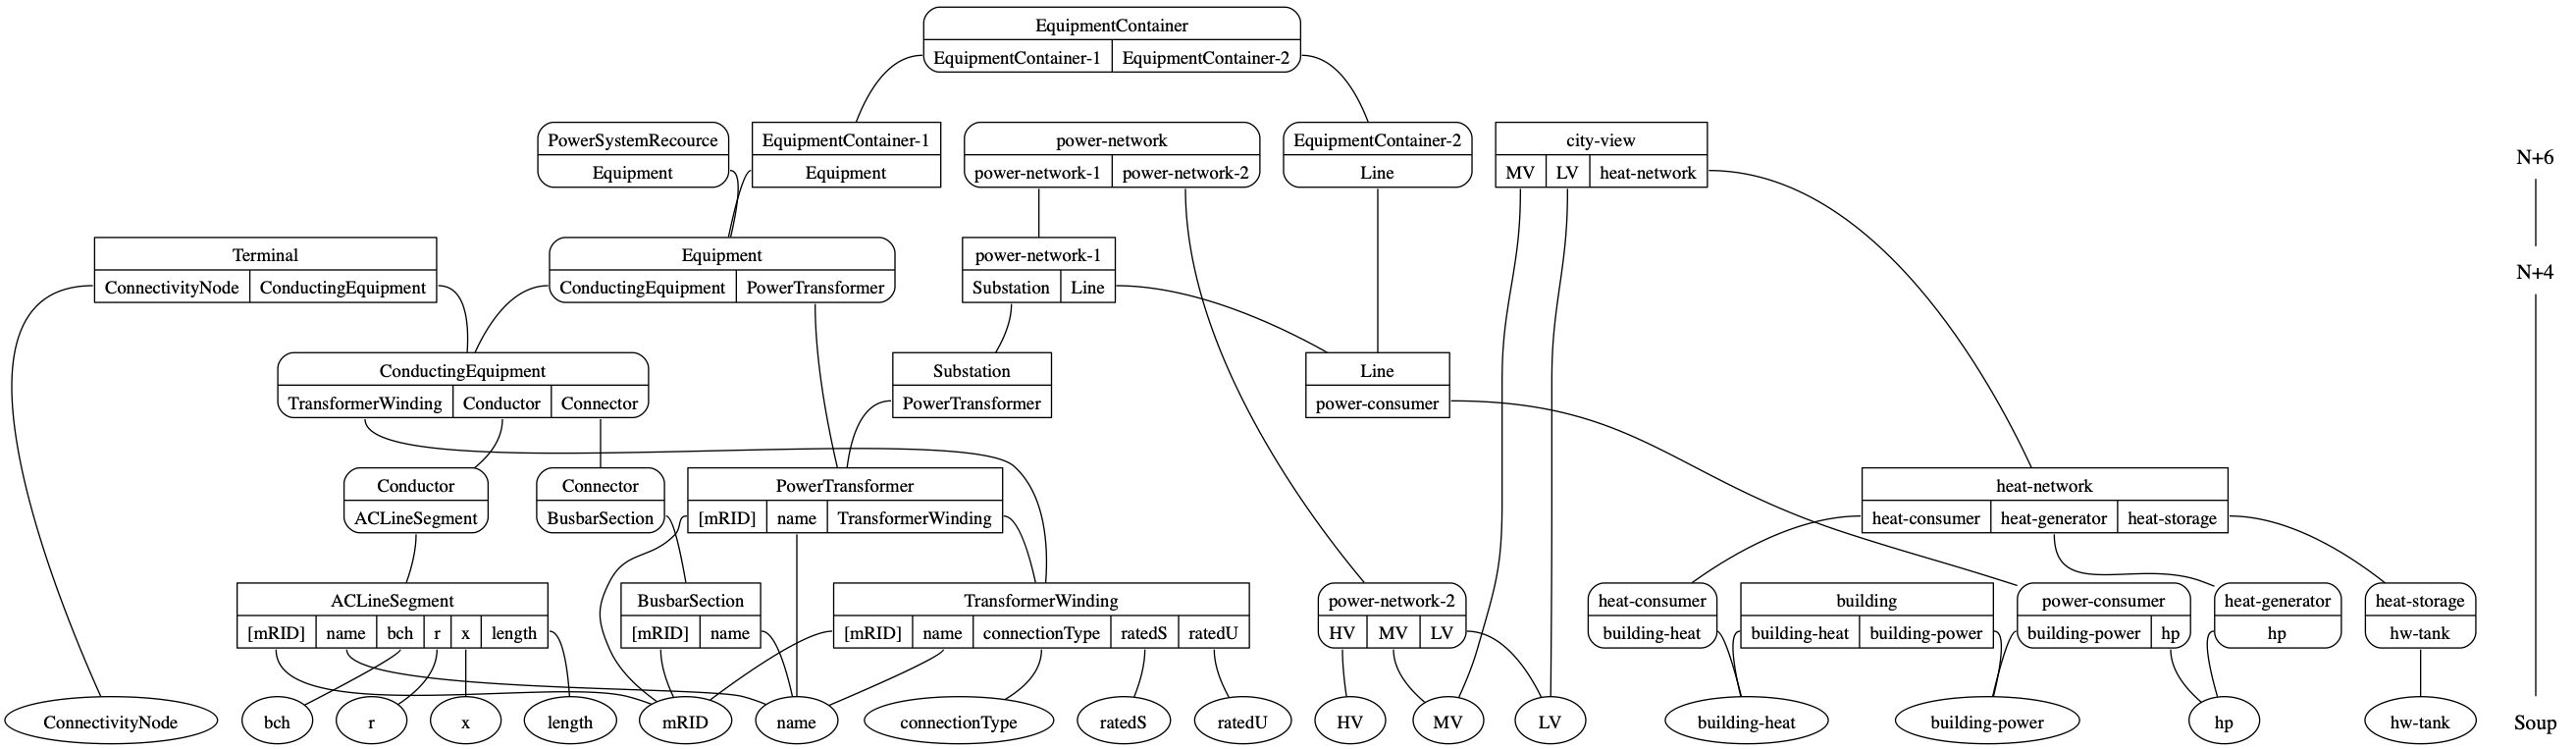

In [14]:
# City view

compile_hn(hn, parser, """
    power-network=<Substation, Line>
    power-network={HV, MV, LV}
    city-view=<MV, LV, heat-network>^N+6
""")

to_graph(hn, fname="/tmp/yoda-CIM-multilevel-eg-view", view=False)
Image(filename='/tmp/yoda-CIM-multilevel-eg-view.png', width=1600, height=1200)

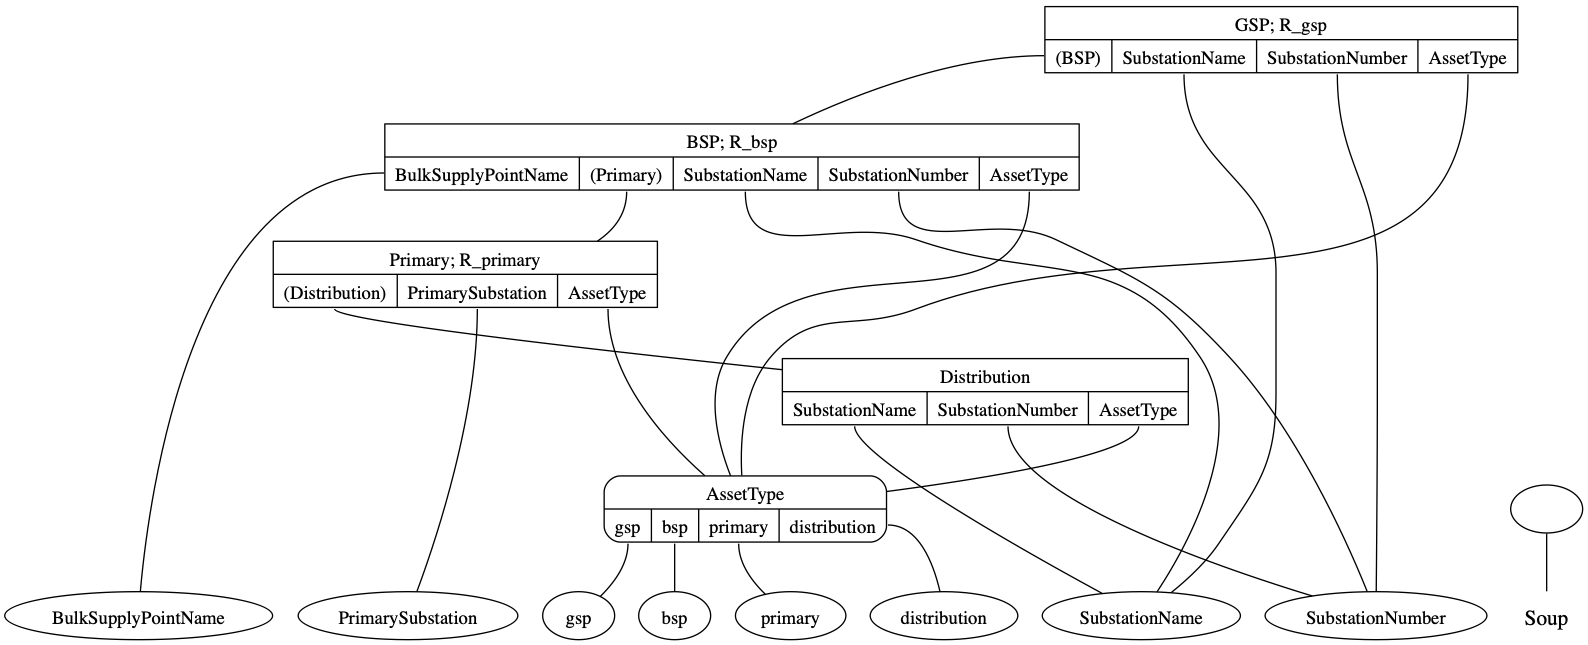

In [6]:
hn = Hypernetwork()
parser = load_parser()

compile_hn(hn, parser, """
        GSP=<(BSP), SubstationName, SubstationNumber, AssetType; R_gsp>
        BSP=<BulkSupplyPointName, (Primary), SubstationName, SubstationNumber, AssetType; R_bsp>
        Primary=<(Distribution), PrimarySubstation, AssetType; R_primary>
        Distribution=<SubstationName, SubstationNumber, AssetType>
        AssetType={gsp, bsp, primary, distribution}
""")

to_graph(hn, fname="/tmp/yoda-CIM-multilevel-eg", view=False)
Image(filename='/tmp/yoda-CIM-multilevel-eg.png', width=1200, height=1200)